In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import os
import json
from datetime import datetime
import inspect
import os
import sys
import importlib
sys.path.append('../Classes')
from my_model_class import Model
from my_solving_class import Solving
import sgh_class
importlib.reload(sgh_class)

from scipy.integrate import solve_ivp
import colorsys
import matplotlib.colors as mcolors
%matplotlib widget

In [4]:
red = ['#fda2b7', '#d10333', '#6c011a']
yellow = ['#fde69a', '#f9c105', '#c79b04']
blue = ['#3fb5fb', '#0384d0', '#02456c']

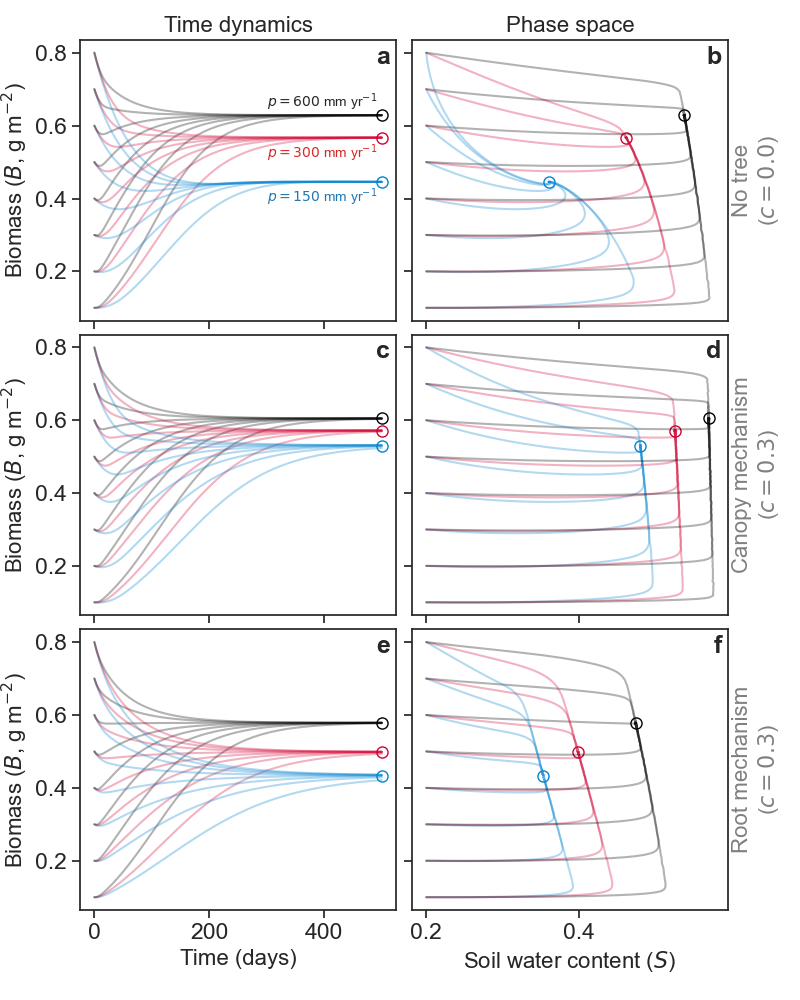

In [5]:
x = sgh_class.SGH_class()
t_span = (0, 500)
t_eval = np.linspace(t_span[0], t_span[1], 300)

fig, ax = plt.subplots(3, 2, figsize=(8,10), sharey='row', sharex='col')
fig.subplots_adjust(left=0.10, bottom=0.09, right=0.91, top=0.96, wspace=0.05, hspace=0.05)

init_b = np.arange(0.1,0.9,0.1)
p_list = [150/180.0, 300/180.0, 600/180.0]
color=[blue[1], red[1], 'black']
for j, b in enumerate(init_b):
    init_guess=[b, 0.2]

    for i,p in enumerate(p_list):
        sol = x.time_integration(t_span=(0,500), init_guess=init_guess, tree_root_active=0, shading_active=1, p=p, c=0.0)
        b,s = sol.y; time = sol.t
        ax[0, 0].plot(time, b, color=color[i], alpha=0.3)
        ax[0, 1].plot(s, b, color=color[i], alpha=0.3)
        if j==3:
            ax[0, 0].plot([time[-1]], [b[-1]], marker='o', markerfacecolor='None', markeredgecolor=color[i], markersize=8)
            ax[0, 1].plot([s[-1]], [b[-1]], marker='o', markerfacecolor='None', markeredgecolor=color[i], markersize=8)

        sol = x.time_integration(t_span=(0,500), init_guess=init_guess, tree_root_active=0, shading_active=1, p=p, c=0.3)
        b,s = sol.y; time = sol.t
        ax[1, 0].plot(time, b, color=color[i], alpha=0.3)
        ax[1, 1].plot(s, b, color=color[i], alpha=0.3)
        if j==3:
            ax[1, 0].plot([time[-1]], [b[-1]], marker='o', markerfacecolor='None', markeredgecolor=color[i], markersize=8)
            ax[1, 1].plot([s[-1]], [b[-1]], marker='o', markerfacecolor='None', markeredgecolor=color[i], markersize=8)

        sol = x.time_integration(t_span=(0,500), init_guess=init_guess, tree_root_active=1, shading_active=0, p=p, c=0.3)
        b,s = sol.y; time = sol.t
        ax[2, 0].plot(time, b, color=color[i], alpha=0.3)
        ax[2, 1].plot(s, b, color=color[i], alpha=0.3)
        if j==3:
            ax[2, 0].plot([time[-1]], [b[-1]], marker='o', markerfacecolor='None', markeredgecolor=color[i], markersize=8)
            ax[2, 1].plot([s[-1]], [b[-1]], marker='o', markerfacecolor='None', markeredgecolor=color[i], markersize=8)

ax[0, 0].text(300, 0.65, rf'$p=600$ mm yr$^{{-1}}$', fontsize=10)
ax[0, 0].text(300, 0.51, rf'$p=300$ mm yr$^{{-1}}$', fontsize=10, color='tab:red')
ax[0, 0].text(300, 0.39, rf'$p=150$ mm yr$^{{-1}}$', fontsize=10, color='tab:blue')

ax[0, 0].set_ylabel(r'Biomass ($\mathit{B}$, g m$^{-2}$)',fontsize=16)
ax[1, 0].set_ylabel(r'Biomass ($\mathit{B}$, g m$^{-2}$)',fontsize=16)
ax[2, 0].set_ylabel(r'Biomass ($\mathit{B}$, g m$^{-2}$)',fontsize=16)
ax[2, 0].set_xlabel(r'Time (days)',fontsize=16)
ax[2, 1].set_xlabel(r'Soil water content ($\mathit{S}$)',fontsize=16)

ax[0, 1].text(1.09, 0.5, 'No tree\n' +r'($c=0.0$)', rotation=90, fontsize=16, va='center', ha='center', color='gray', transform=ax[0, 1].transAxes)
ax[1, 1].text(1.09, 0.5, 'Canopy mechanism\n' +r'($c=0.3$)', rotation=90, fontsize=16, va='center', ha='center', color='gray', transform=ax[1, 1].transAxes)
ax[2, 1].text(1.09, 0.5, 'Root mechanism\n' +r'($c=0.3$)', rotation=90, fontsize=16, va='center', ha='center', color='gray', transform=ax[2, 1].transAxes)

ax[0, 0].set_title('Time dynamics', fontsize=16)
ax[0, 1].set_title('Phase space', fontsize=16)

ax[0, 0].text(0.98, 0.98, 'a', transform=ax[0, 0].transAxes, fontsize=18, fontweight='bold', ha='right', va='top')
ax[0, 1].text(0.98, 0.98, 'b', transform=ax[0, 1].transAxes, fontsize=18, fontweight='bold', ha='right', va='top')
ax[1, 0].text(0.98, 0.98, 'c', transform=ax[1, 0].transAxes, fontsize=18, fontweight='bold', ha='right', va='top')
ax[1, 1].text(0.98, 0.98, 'd', transform=ax[1, 1].transAxes, fontsize=18, fontweight='bold', ha='right', va='top')
ax[2, 0].text(0.98, 0.98, 'e', transform=ax[2, 0].transAxes, fontsize=18, fontweight='bold', ha='right', va='top')
ax[2, 1].text(0.98, 0.98, 'f', transform=ax[2, 1].transAxes, fontsize=18, fontweight='bold', ha='right', va='top')

fig.savefig('dynamics.png', dpi=300)#, bbox_inches='tight')
fig.savefig('dynamics.pdf',        )# bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p=1.5, fsolve failed to converge to a valid solution. Falling back to time integration.
p=1.5, fsolve failed to converge to a valid solution. Falling back to time integration.


/Users/odedh/Desktop/SGH-paper/Submission /code to github/sgh_class.py:81: RuntimeWarning: overflow encountered in scalar power
  return p['ksat'] * S ** p['gamma']
/Users/odedh/Desktop/SGH-paper/Submission /code to github/sgh_class.py:118: RuntimeWarning: overflow encountered in scalar multiply
  return p['a'] * self.shading_assimilation(B, S, **kwargs) * S * B * self.carrying_capacity(B, S, **kwargs)
/var/folders/jm/7q3bqdxj5bs8tn13m8qn22kr0000gn/T/ipykernel_37465/3673773436.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set(ylim=(0, 700),


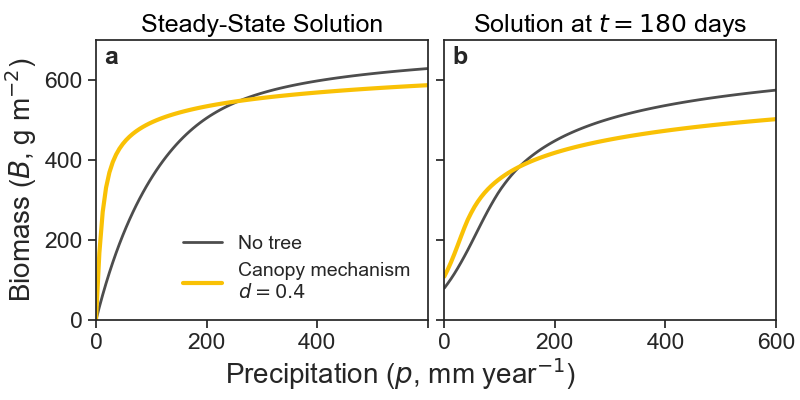

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey='row')
fig.subplots_adjust(left=0.12, bottom=0.20, right=0.97, top=0.90, wspace=0.05, hspace=0.05)

p_list = np.linspace(0, 600, 100)/180.0

######################
# steady-state
######################

x = sgh_class.SGH_class()
x.params.update(tree_root_active=0, shading_active=1)
sol0_ss = []; sol1_ss = [];
for precip in p_list:
        sol0_ss.append(x.solutions_fsolve(p=precip, c=0))
        sol1_ss.append(x.solutions_fsolve(p=precip, c=0.4))

sol0_ss = np.array(sol0_ss)*1000
sol1_ss = np.array(sol1_ss)*1000

ax[0].plot(p_list*180, sol0_ss[:,0], color=3*[0.3], label='No tree', linewidth=2, ls='-')
ax[0].plot(p_list*180, sol1_ss[:,0], color=yellow[1], label='Canopy mechanism\n' + r'$d=0.4$', linewidth=3)

ax[0].legend(frameon=False, fontsize=14)
######################
# transient: stop at day 200
######################

t_span = (0, 180)
t_eval = np.linspace(t_span[0], t_span[1], 180)

sol0_dy = []; sol1_dy = [];
init_b = 0.2
init_s = 0.2
for precip in p_list:
    sol = x.time_integration(t_span=t_span, init_guess=[init_b, init_s], tree_root_active=0, shading_active=1, p=precip, c=0.0)
    b,s = sol.y; time = sol.t
    sol0_dy.append(b[-1])

    sol = x.time_integration(t_span=t_span, init_guess=[init_b, init_s], tree_root_active=0, shading_active=1, p=precip, c=0.4)
    b,s = sol.y; time = sol.t
    sol1_dy.append(b[-1])

sol0_dy = np.array(sol0_dy)*1000
sol1_dy = np.array(sol1_dy)*1000

ax[1].plot(p_list*180, sol0_dy, color=3*[0.3], label='No tree', linewidth=2, ls='-')
ax[1].plot(p_list*180, sol1_dy, color=yellow[1], label='Canopy mechanism', linewidth=3)

ax[0].set_title(r'Steady-State Solution', color='black')
ax[1].set_title(r'Solution at $t=180$ days', color='black')

ax[0].set_ylabel(r'Biomass ($\mathit{B}$, g m$^{-2}$)',fontsize=20)
ax[0].set(ylim=(0, 700),
          xlim=(0, 600),
          xticklabels=[0,200,400,''])
ax[1].set(xlim=(0, 600))

fig.supxlabel(r'Precipitation ($\mathit{p}$, mm year$^{-1}$)', fontsize=20, y=0.02)

ax[0].text(0.025, 0.915, 'a', transform=ax[0].transAxes, fontsize=18, fontweight='bold')
ax[1].text(0.025, 0.915, 'b', transform=ax[1].transAxes, fontsize=18, fontweight='bold')

fig.savefig('dynamics_transition.png', dpi=300)
fig.savefig('dynamics_transition.pdf')
